In [1]:
import pandas as pd
import seaborn as srn
import statistics as sts
from os import path

In [2]:
dataset = pd.read_csv(path.join("..", "data", "tempo.csv"), sep=";")
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [3]:
aparencia = dataset.groupby(["Aparencia"]).size()
aparencia

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

<AxesSubplot:xlabel='Aparencia'>

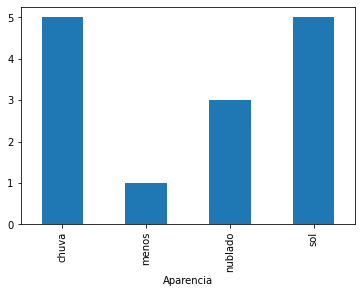

In [4]:
aparencia.plot.bar()

In [5]:
vento = dataset.groupby(["Vento"]).size()
vento

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

<AxesSubplot:xlabel='Vento'>

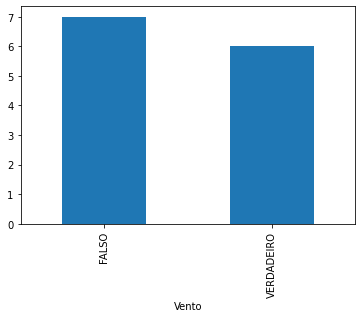

In [6]:
vento.plot.bar()

In [7]:
jogar = dataset.groupby(["Jogar"]).size()
jogar

Jogar
nao    5
sim    9
dtype: int64

<AxesSubplot:xlabel='Jogar'>

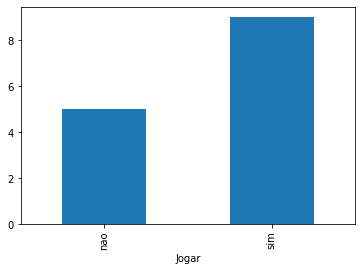

In [8]:
jogar.plot.bar()

In [9]:
dataset["Temperatura"].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

Text(0.5, 1.0, 'Temperatura')

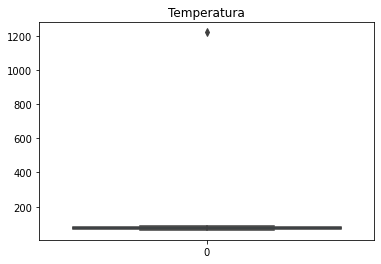

In [10]:
srn.boxplot(data=dataset["Temperatura"]).set_title("Temperatura")

Text(0.5, 1.0, 'Temperatura')

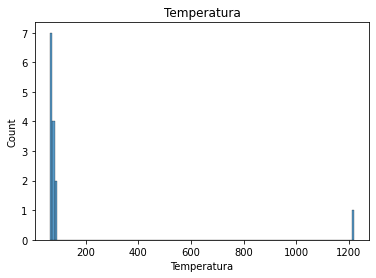

In [11]:
srn.histplot(dataset["Temperatura"]).set_title("Temperatura")

In [12]:
dataset["Umidade"].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

Text(0.5, 1.0, 'Umidade')

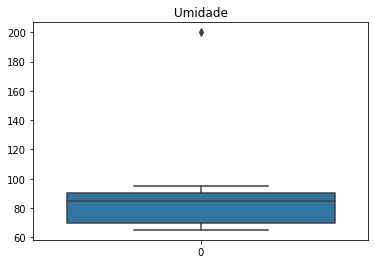

In [13]:
srn.boxplot(data=dataset["Umidade"]).set_title("Umidade")

Text(0.5, 1.0, 'Umidade')

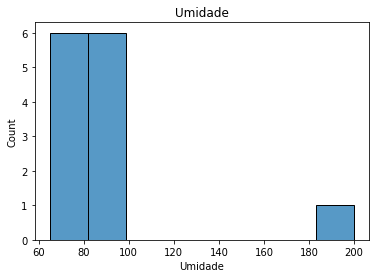

In [14]:
srn.histplot(dataset["Umidade"]).set_title("Umidade")

In [15]:
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [16]:
aparencia

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

In [17]:
dataset.loc[dataset["Aparencia"] == "menos", "Aparencia"] = "sol"
aparencia = dataset.groupby("Aparencia").size()
aparencia

Aparencia
chuva      5
nublado    3
sol        6
dtype: int64

In [18]:
mediana_temperatura = sts.median(dataset["Temperatura"])
mediana_temperatura

73.5

In [19]:
dataset.loc[(dataset["Temperatura"] < -130) | (dataset["Temperatura"] > 130), "Temperatura"] = mediana_temperatura
dataset.loc[(dataset["Temperatura"] < -130) | (dataset["Temperatura"] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [20]:
umidade = dataset.groupby(["Umidade"]).size()
umidade

Umidade
65.0     1
70.0     3
75.0     1
80.0     1
85.0     1
86.0     1
90.0     2
91.0     1
95.0     1
200.0    1
dtype: int64

In [21]:
dataset["Umidade"].isnull().sum()

1

In [22]:
mediana_umidade = sts.median(dataset["Umidade"])
mediana_umidade

85.5

In [23]:
dataset["Umidade"].fillna(mediana_umidade, inplace=True)
dataset["Umidade"].isnull().sum()

0

In [24]:
dataset.loc[(dataset["Umidade"] < 0) | (dataset["Umidade"]) > 100]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [25]:
ventos = dataset.groupby(["Vento"]).size()
vento

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [26]:
dataset["Vento"].isnull().sum()

1

In [27]:
dataset["Vento"].fillna("FALSO", inplace=True)